In [ ]:
from pathlib import Path
import pandas as pd, numpy as np, os, json
import matplotlib.pyplot as plt

DATA_DIR = Path("../MLPC2025_dataset")  
META_CSV = DATA_DIR / "metadata.csv"
ANN_CSV  = DATA_DIR / "annotations.csv"

print("path OK ：", META_CSV.exists(), ANN_CSV.exists())

path OK ： True True


In [3]:
meta = pd.read_csv(META_CSV)
ann  = pd.read_csv(ANN_CSV)

print(f"audio number: {len(meta):,}")
print(f"anotation number: {len(ann):,}")
display(meta.head())
display(ann.head())

audio number: 9,026
anotation number: 35,826


,filename,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",617030,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...,65,51.7090740261 5.30657821347,15.6,43.535
1,637408.mp3,"jackhammer, construction, reflected",637408,https://freesound.org/people/kyles/sounds/637408/,kyles,http://creativecommons.org/publicdomain/zero/1.0/,construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...,23,NaN,209.8,232.356
2,615545.mp3,"river-side, field-recording, bell, fields, vil...",615545,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,4 church-bells 7AM at river NL 210718_0304.wav,Four differed church bells tell it is 7 o’cloc...,227,51.7405127581 5.23133654974,6.0,31.666
3,410867.mp3,"sports-crowd, applause, crowd, crowd-cheer, Ad...",410867,https://freesound.org/people/NobodyYouKnowOf/s...,NobodyYouKnowOf,http://creativecommons.org/publicdomain/zero/1.0/,crowd_the_hill_language.wav,Crowd making some noise at a SANFL Aussie rule...,308,-34.9157073897 138.596134186,19.8,48.569
4,65916.mp3,"bones, breaking, broken, chime, clatter, explo...",65916,https://freesound.org/people/BristolStories/so...,BristolStories,http://creativecommons.org/licenses/by-nc/3.0/,shells-tinkle.WAV,This is a shells wind chime. I used it for the...,7721,NaN,23.6,40.797


,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3
2,161989998,660337.mp3,8960534646813062318784592632173589349806817458...,A child speaks with a high-pitched voice,12.493984,13.315680,660337_Aeroplane Takeoff From Cabinwav.mp3
3,161978339,725686.mp3,4540509031938851510799116530500792274849113758...,A high pitch meowing coming from a cat,16.018221,16.991704,725686_Black Cat Talking.mp3
4,161985729,97606.mp3,1085174475307080254018414698413953957857995126...,An extremely loud brushing sound on a construc...,0.000000,1.626352,97606_jackhammer med distwav.mp3


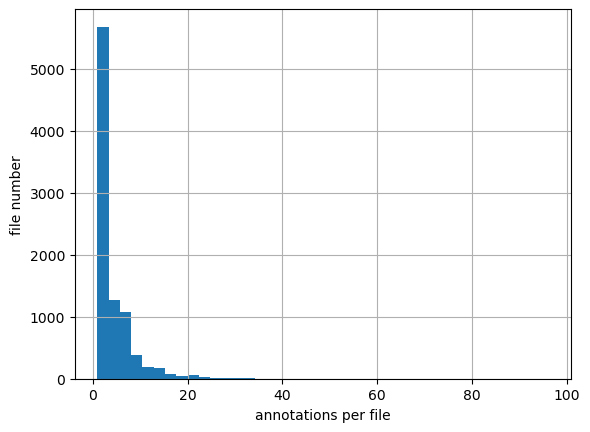

mean annotation per file： 3.9692000886328387


In [4]:
ann_per_file = ann.groupby("filename").size()
ax = ann_per_file.hist(bins=40)
ax.set_xlabel("annotations per file")
ax.set_ylabel("file number")
plt.show()

print("mean annotation per file：", ann_per_file.mean())

In [5]:
title_emb   = np.load(DATA_DIR / "metadata_title_embeddings.npz")["embeddings"]
kw_emb      = np.load(DATA_DIR / "metadata_keywords_embeddings.npz")["embeddings"]
ann_emb     = np.load(DATA_DIR / "annotations_text_embeddings.npz")["embeddings"]

print("title  embeddings:", title_emb.shape)
print("keyword embeddings:", kw_emb.shape)
print("ann     embeddings:", ann_emb.shape)

title  embeddings: (9026, 1024)
keyword embeddings: (9026, 1024)
ann     embeddings: (35826, 1024)


sample file: 451516.mp3


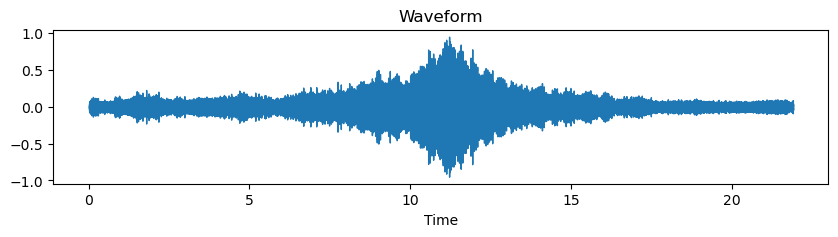

features: ['embeddings', 'melspectrogram', 'mfcc', 'mfcc_delta', 'mfcc_delta2', 'flatness', 'centroid', 'flux', 'energy', 'power', 'bandwidth', 'contrast', 'zerocrossingrate']
MFCC shape: (183, 32)
Zero‑Cross shape: (183, 1)


In [10]:
import random, librosa, librosa.display

idx   = random.randint(0, len(meta)-1)
fname = meta.loc[idx, "filename"]
print("sample file:", fname)

# audio
wav, sr = librosa.load(DATA_DIR / "audio" / fname, sr=16_000)
plt.figure(figsize=(10, 2))
librosa.display.waveshow(wav, sr=sr)
plt.title("Waveform")
plt.show()

# audio features
feat_file = fname.replace(".mp3", ".npz")
feat      = np.load(DATA_DIR / "audio_features" / feat_file)

print("features:", list(feat.keys()))
print("MFCC shape:", feat["mfcc"].shape)          # (time, 32)
print("Zero‑Cross shape:", feat["zerocrossingrate"].shape)

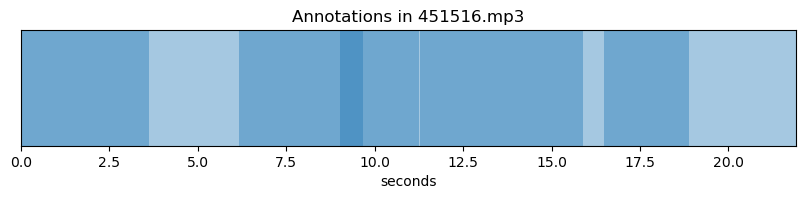

In [11]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 1.5))
dur = librosa.get_duration(y=wav, sr=sr)
ax.set_xlim(0, dur)
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_xlabel("seconds")


sub = ann[ann.filename == fname]
for _, row in sub.iterrows():
    ax.add_patch(patches.Rectangle((row.onset, 0), row.offset-row.onset, 1,
                                   facecolor="tab:blue", alpha=0.4))
ax.set_title(f"Annotations in {fname}")
plt.show()